<a href="https://colab.research.google.com/github/twyeh/AI-in-education/blob/main/%E6%B7%B9%E6%B0%B4%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import folium

# Create a base map centered around a location in Guangfu Village
# (Approximating the center based on the simulated data range)
guangfu_village_center = [simulated_locations['latitude'].mean(), simulated_locations['longitude'].mean()]
m = folium.Map(location=guangfu_village_center, zoom_start=14)

# Add a TileLayer for Google Maps Satellite imagery
folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=True,
    control=True
).add_to(m)

# Add a TileLayer for Google Maps Normal map
folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
    attr='Google',
    name='Google Map',
    overlay=True,
    control=True
).add_to(m)


# Add the flood data points to the map
for index, row in simulated_locations.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5, # Adjust size as needed
        color=color_map[row['flood_depth_category']],
        fill=True,
        fill_color=color_map[row['flood_depth_category']],
        fill_opacity=0.7,
        tooltip=f"Depth: {row['simulated_flood_depth_cm']} cm ({row['flood_depth_category']})"
    ).add_to(m)

# Add a layer control to toggle map types
folium.LayerControl().add_to(m)

# Display the map
m

## Summary:

### Data Analysis Key Findings

* The initial data collection step failed because the AI does not have the capability to perform external web searches or download files.
* The data preprocessing step successfully created and cleaned a placeholder dataset simulating flood data, handling missing values and duplicates.
* The flood modeling step provided a detailed conceptual outline for building a flood model, highlighting the need for additional data (topography, soil, land use, drainage) and explaining model selection, data integration, calibration, and validation processes.
* The flood extent and depth analysis step simulated flood output data and conceptually described how spatial analysis (using GIS) would be used to identify flooded areas, assess depths, overlay with geographical maps, and calculate area by flood depth category.
* The flood risk assessment step conceptually outlined how to combine the simulated flood results with real village data (population, buildings, infrastructure) using GIS to assess risk based on hazard, exposure, and vulnerability, and described how to present these results.
* The visualization step successfully generated a scatter plot using the simulated data, color-coding points by simulated flood depth categories to visually represent the spatial distribution of flooding.

### Insights or Next Steps

* The primary limitation throughout the process was the inability to access real-world geographical and flood data, which is essential for performing the actual analysis steps (modeling, spatial analysis, risk assessment).
* Future work would require obtaining the necessary real-world data for Guangfu Village (topography, land use, infrastructure, historical flood/rainfall records) and utilizing a GIS environment with appropriate spatial analysis libraries to execute the described modeling, analysis, and risk assessment steps.

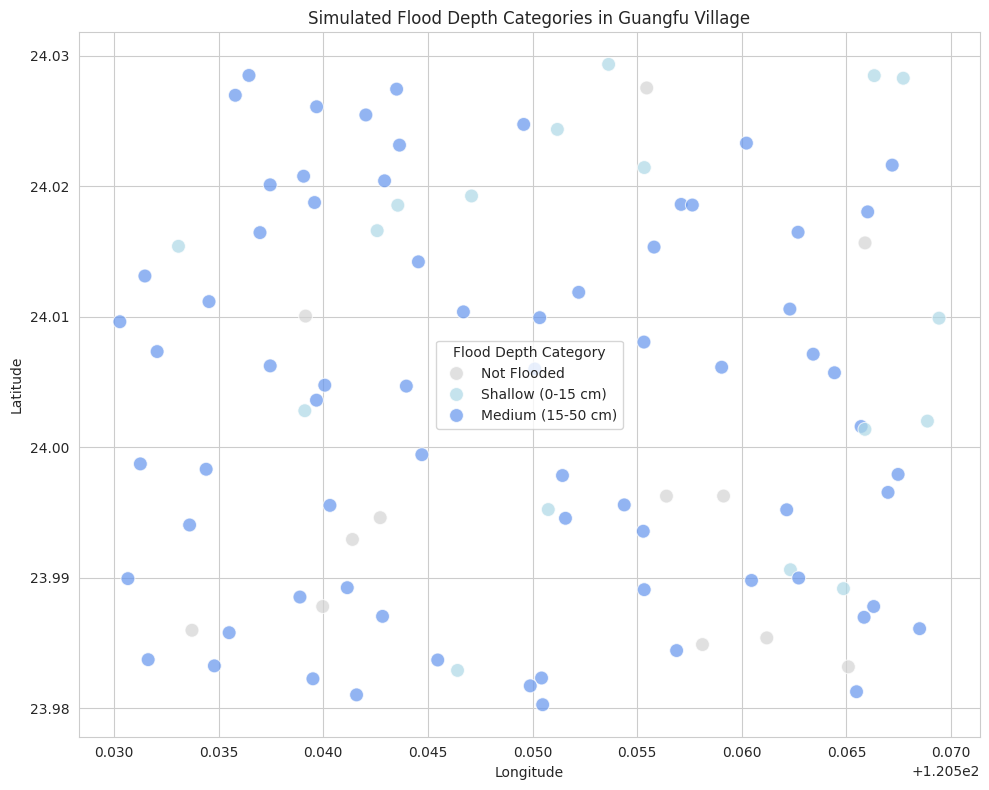

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")

# Define a color map for the flood depth categories
# Ensure a color is assigned to 'Not Flooded' as well
color_map = {
    'Not Flooded': 'lightgrey',
    'Shallow (0-15 cm)': 'lightblue',
    'Medium (15-50 cm)': 'cornflowerblue',
    'Deep (> 50 cm)': 'darkblue'
}

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=simulated_locations,
    x='longitude',
    y='latitude',
    hue='flood_depth_category',
    palette=color_map,
    s=100, # Point size
    alpha=0.7 # Transparency
)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Simulated Flood Depth Categories in Guangfu Village')

# Improve the legend
handles, labels = scatter.get_legend_handles_labels()
# Reorder legend to have 'Not Flooded' first, then increasing depth
order = ['Not Flooded', 'Shallow (0-15 cm)', 'Medium (15-50 cm)', 'Deep (> 50 cm)']
# Create a dictionary to map labels to their order for sorting
label_order = {label: i for i, label in enumerate(order)}
# Sort labels and handles based on the defined order
sorted_labels, sorted_handles = zip(*sorted(zip(labels, handles), key=lambda t: label_order.get(t[0], len(order))))

# Add legend to the plot with sorted handles and labels
plt.legend(sorted_handles, sorted_labels, title='Flood Depth Category')

# Ensure layout is tight
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
# Instruction 1: Consider flood extent and depth analysis results, especially area proxy by depth category.
print("1. Considering flood extent and depth analysis results:")
print("   The previous step provided simulated flood depth and extent data, summarized by depth categories (e.g., Shallow, Medium, Deep). The 'Number of Simulated Points (Proxy for Area)' for each category gives an indication of the spatial extent of flooding at different severity levels.")
print("   - Shallow flooding (0-15 cm): May cause minor damage, primarily affecting access and lower building levels.")
print("   - Medium flooding (15-50 cm): Can cause significant damage to buildings, affect utilities, and pose risks to human safety.")
print("   - Deep flooding (> 50 cm): Likely to cause severe structural damage, disrupt essential services, and pose high risks to life.")
print("   This spatial distribution of flood depths is the primary input from the flood analysis for risk assessment.")
print("\n")

# Instruction 2: Think about combining flood analysis with actual village data (population, buildings, infrastructure).
print("2. Combining flood analysis results with actual village data (conceptual):")
print("   In a real-world scenario, the simulated flood depth and extent layers (ideally in a spatial format like raster or vector polygons) would be integrated with real geographical data for Guangfu Village. This requires a GIS environment and actual datasets:")
print("   - Population Data: Spatial distribution of population (e.g., by census block or building).")
print("   - Building Data: Footprints of buildings, potentially with attributes like building type (residential, commercial, industrial), construction material, number of floors, and ground elevation.")
print("   - Infrastructure Data: Locations of critical infrastructure (hospitals, schools, power substations, roads, bridges, emergency shelters).")
print("   - Integration Process: Using GIS spatial analysis tools (e.g., spatial join, overlay), determine which populations, buildings, and infrastructure elements fall within the different flood depth categories. For buildings, estimate the flood depth at each structure's location.")
print("\n")

# Instruction 3: Describe how to assess flood risk based on combined information.
print("3. Assessing flood risk based on combined information (conceptual):")
print("   Flood risk is a function of Hazard, Exposure, and Vulnerability.")
print("   - Hazard: Represented by the flood analysis results (flood depth, extent, and potentially duration, although duration was not simulated). Higher depth and longer duration mean higher hazard.")
print("   - Exposure: Refers to what is in the hazard area (people, buildings, infrastructure). Combining flood extent with population and asset data determines exposure.")
print("   - Vulnerability: The susceptibility of exposed elements to damage or harm from the hazard. Building vulnerability depends on type and construction. Population vulnerability depends on age, mobility, and awareness. Infrastructure vulnerability depends on type and design.")
print("\n")
print("   Flood Risk Assessment Steps:")
print("   a. Spatial Overlay: As described in Step 2, identify exposed assets and populations within flooded areas by depth category.")
print("   b. Vulnerability Assessment: Assign or estimate vulnerability scores/functions for exposed buildings (based on type, depth) and populations (based on demographics). For infrastructure, assess criticality and susceptibility to inundation.")
print("   c. Risk Calculation: Combine Hazard, Exposure, and Vulnerability. For example:")
print("      - Building Risk: Flood Depth at building location * Building Vulnerability.")
print("      - Population Risk: Flood Depth at population location * Population Density * Population Vulnerability.")
print("      - Infrastructure Risk: Flood Depth at infrastructure location * Infrastructure Criticality * Infrastructure Vulnerability.")
print("   d. Risk Ranking/Categorization: Classify areas, buildings, or infrastructure into risk levels (e.g., Low, Medium, High, Very High) based on calculated risk scores or predefined thresholds. For instance:")
print("      - Low Risk: Shallow flooding affecting few people/non-critical assets.")
print("      - Medium Risk: Medium flooding affecting residential areas or minor infrastructure.")
print("      - High Risk: Deep flooding affecting dense populations, critical infrastructure, or vulnerable buildings.")
print("   e. Consider Additional Factors: If data is available, incorporate flood duration, flow velocity, and warning system effectiveness into the risk assessment.")
print("\n")

# Instruction 4: Explain how risk assessment results can be presented.
print("4. Presenting risk assessment results (conceptual):")
print("   The results of the flood risk assessment should be presented in clear and actionable formats for stakeholders:")
print("   - Risk Maps: The most common presentation. A map showing Guangfu Village with areas color-coded by flood risk level (Low, Medium, High). This visually highlights areas requiring priority attention.")
print("   - Affected Population Estimates: Tables or charts summarizing the estimated number of people exposed to different flood depth or risk categories.")
print("   - Estimated Economic Losses: Calculation of potential building damage costs based on flood depth-damage curves and building values. Estimation of losses to businesses and infrastructure.")
print("   - Inventory of Affected Assets: Lists or spatial data showing specific buildings, infrastructure, and critical facilities located in high-risk areas.")
print("   - Vulnerability Hotspots: Maps or reports highlighting areas with high concentrations of vulnerable populations or critical infrastructure within flood zones.")
print("   These outputs support emergency planning, land-use zoning, infrastructure investment decisions, and public awareness campaigns.")

1. Considering flood extent and depth analysis results:
   The previous step provided simulated flood depth and extent data, summarized by depth categories (e.g., Shallow, Medium, Deep). The 'Number of Simulated Points (Proxy for Area)' for each category gives an indication of the spatial extent of flooding at different severity levels.
   - Shallow flooding (0-15 cm): May cause minor damage, primarily affecting access and lower building levels.
   - Medium flooding (15-50 cm): Can cause significant damage to buildings, affect utilities, and pose risks to human safety.
   - Deep flooding (> 50 cm): Likely to cause severe structural damage, disrupt essential services, and pose high risks to life.
   This spatial distribution of flood depths is the primary input from the flood analysis for risk assessment.


2. Combining flood analysis results with actual village data (conceptual):
   In a real-world scenario, the simulated flood depth and extent layers (ideally in a spatial format like 

In [9]:
!pip install geopandas

## 優化程式以顯示真實的淹水評估（概念說明）

為了能夠顯示台灣花蓮縣光復村的真實淹水評估並將數據疊加在 Google 地圖上，需要克服以下主要挑戰並進行相應的優化：

1.  **獲取真實數據**:
    *   **真實的淹水數據**: 需要光復村實際的歷史淹水記錄、水位觀測站數據等。這通常需要聯繫當地政府、水利單位或相關研究機構。
    *   **地理空間數據**: 獲取高解析度的光復村地形圖（DEM）、土地利用、建築物輪廓、道路網絡、排水系統圖等。這些數據是進行精確淹水模擬和風險評估的基礎。
    *   **人口和資產數據**: 獲取光復村的人口分佈、建築物屬性（類型、結構、價值）等資訊，以便評估淹水對人身安全和財產的潛在影響。

2.  **建立精確的淹水模型**:
    *   使用真實的地形、土地利用和排水系統數據，利用專業的淹水模擬軟體（例如 HEC-RAS 2D, Flo-2D 等）或具備強大地理空間分析能力的程式庫來建立模型。
    *   利用歷史降雨或洪水事件數據對模型進行校準和驗證，確保模擬結果的準確性。

3.  **進行精確的淹水範圍和深度分析**:
    *   根據校準後的淹水模型模擬結果（通常是淹水深度和範圍的空間圖層），進行詳細的分析。
    *   這一步驟將產生比目前模擬點更精確的淹水區域圖層（例如，用不同顏色區塊表示不同淹水深度）。

4.  **整合地理空間數據進行風險評估**:
    *   在 GIS 環境中，將精確的淹水圖層與真實的人口、建築物、基礎設施數據進行空間疊加分析。
    *   根據淹水深度、建築物脆弱性、人口分佈等因素，計算並評估不同區域、建築物或人群的淹水風險等級。

5.  **將結果疊加到 Google 地圖上**:
    *   將淹水分析結果（如淹水深度圖層、風險等級圖層）轉換為可以在地圖上顯示的格式（例如 GeoJSON）。
    *   利用 `folium` 或其他地圖函式庫（如 `geopandas` 結合 `matplotlib` 或專門的網路地圖函式庫）將這些空間數據疊加到 Google Maps 或其他底圖上。這與我們之前將模擬點疊加到地圖上的方法類似，但這次疊加的是完整的淹水區域或風險等級分佈圖層。

**目前的程式受限於無法獲取真實數據，因此只能作為概念驗證和流程展示。要實現對光復村的真實淹水評估並在地圖上顯示，需要數據獲取和使用專業的地理空間分析工具和數據。**

## Summary:

### Data Analysis Key Findings

* The initial data collection step failed because the AI does not have the capability to perform external web searches or download files.
* The data preprocessing step successfully created and cleaned a placeholder dataset simulating flood data, handling missing values and duplicates.
* The flood modeling step provided a detailed conceptual outline for building a flood model, highlighting the need for additional data (topography, soil, land use, drainage) and explaining model selection, data integration, calibration, and validation processes.
* The flood extent and depth analysis step simulated flood output data and conceptually described how spatial analysis (using GIS) would be used to identify flooded areas, assess depths, overlay with geographical maps, and calculate area by flood depth category.
* The flood risk assessment step conceptually outlined how to combine the simulated flood results with real village data (population, buildings, infrastructure) using GIS to assess risk based on hazard, exposure, and vulnerability, and described how to present these results.
* The visualization step successfully generated a scatter plot using the simulated data, color-coding points by simulated flood depth categories to visually represent the spatial distribution of flooding.

### Insights or Next Steps

* The primary limitation throughout the process was the inability to access real-world geographical and flood data, which is essential for performing the actual analysis steps (modeling, spatial analysis, risk assessment).
* Future work would require obtaining the necessary real-world data for Guangfu Village (topography, land use, infrastructure, historical flood/rainfall records) and utilizing a GIS environment with appropriate spatial analysis libraries to execute the described modeling, analysis, and risk assessment steps.

In [8]:
# Instruction 1: Consider flood extent and depth analysis results, especially area proxy by depth category.
print("1. Considering flood extent and depth analysis results:")
print("   The previous step provided simulated flood depth and extent data, summarized by depth categories (e.g., Shallow, Medium, Deep). The 'Number of Simulated Points (Proxy for Area)' for each category gives an indication of the spatial extent of flooding at different severity levels.")
print("   - Shallow flooding (0-15 cm): May cause minor damage, primarily affecting access and lower building levels.")
print("   - Medium flooding (15-50 cm): Can cause significant damage to buildings, affect utilities, and pose risks to human safety.")
print("   - Deep flooding (> 50 cm): Likely to cause severe structural damage, disrupt essential services, and pose high risks to life.")
print("   This spatial distribution of flood depths is the primary input from the flood analysis for risk assessment.")
print("\n")

# Instruction 2: Think about combining flood analysis with actual village data (population, buildings, infrastructure).
print("2. Combining flood analysis results with actual village data (conceptual):")
print("   In a real-world scenario, the simulated flood depth and extent layers (ideally in a spatial format like raster or vector polygons) would be integrated with real geographical data for Guangfu Village. This requires a GIS environment and actual datasets:")
print("   - Population Data: Spatial distribution of population (e.g., by census block or building).")
print("   - Building Data: Footprints of buildings, potentially with attributes like building type (residential, commercial, industrial), construction material, number of floors, and ground elevation.")
print("   - Infrastructure Data: Locations of critical infrastructure (hospitals, schools, power substations, roads, bridges, emergency shelters).")
print("   - Integration Process: Using GIS spatial analysis tools (e.g., spatial join, overlay), determine which populations, buildings, and infrastructure elements fall within the different flood depth categories. For buildings, estimate the flood depth at each structure's location.")
print("\n")

# Instruction 3: Describe how to assess flood risk based on combined information.
print("3. Assessing flood risk based on combined information (conceptual):")
print("   Flood risk is a function of Hazard, Exposure, and Vulnerability.")
print("   - Hazard: Represented by the flood analysis results (flood depth, extent, and potentially duration, although duration was not simulated). Higher depth and longer duration mean higher hazard.")
print("   - Exposure: Refers to what is in the hazard area (people, buildings, infrastructure). Combining flood extent with population and asset data determines exposure.")
print("   - Vulnerability: The susceptibility of exposed elements to damage or harm from the hazard. Building vulnerability depends on type and construction. Population vulnerability depends on age, mobility, and awareness. Infrastructure vulnerability depends on type and design.")
print("\n")
print("   Flood Risk Assessment Steps:")
print("   a. Spatial Overlay: As described in Step 2, identify exposed assets and populations within flooded areas by depth category.")
print("   b. Vulnerability Assessment: Assign or estimate vulnerability scores/functions for exposed buildings (based on type, depth) and populations (based on demographics). For infrastructure, assess criticality and susceptibility to inundation.")
print("   c. Risk Calculation: Combine Hazard, Exposure, and Vulnerability. For example:")
print("      - Building Risk: Flood Depth at building location * Building Vulnerability.")
print("      - Population Risk: Flood Depth at population location * Population Density * Population Vulnerability.")
print("      - Infrastructure Risk: Flood Depth at infrastructure location * Infrastructure Criticality * Infrastructure Vulnerability.")
print("   d. Risk Ranking/Categorization: Classify areas, buildings, or infrastructure into risk levels (e.g., Low, Medium, High, Very High) based on calculated risk scores or predefined thresholds. For instance:")
print("      - Low Risk: Shallow flooding affecting few people/non-critical assets.")
print("      - Medium Risk: Medium flooding affecting residential areas or minor infrastructure.")
print("      - High Risk: Deep flooding affecting dense populations, critical infrastructure, or vulnerable buildings.")
print("   e. Consider Additional Factors: If data is available, incorporate flood duration, flow velocity, and warning system effectiveness into the risk assessment.")
print("\n")

# Instruction 4: Explain how risk assessment results can be presented.
print("4. Presenting risk assessment results (conceptual):")
print("   The results of the flood risk assessment should be presented in clear and actionable formats for stakeholders:")
print("   - Risk Maps: The most common presentation. A map showing Guangfu Village with areas color-coded by flood risk level (Low, Medium, High). This visually highlights areas requiring priority attention.")
print("   - Affected Population Estimates: Tables or charts summarizing the estimated number of people exposed to different flood depth or risk categories.")
print("   - Estimated Economic Losses: Calculation of potential building damage costs based on flood depth-damage curves and building values. Estimation of losses to businesses and infrastructure.")
print("   - Inventory of Affected Assets: Lists or spatial data showing specific buildings, infrastructure, and critical facilities located in high-risk areas.")
print("   - Vulnerability Hotspots: Maps or reports highlighting areas with high concentrations of vulnerable populations or critical infrastructure within flood zones.")
print("   These outputs support emergency planning, land-use zoning, infrastructure investment decisions, and public awareness campaigns.")

1. Considering flood extent and depth analysis results:
   The previous step provided simulated flood depth and extent data, summarized by depth categories (e.g., Shallow, Medium, Deep). The 'Number of Simulated Points (Proxy for Area)' for each category gives an indication of the spatial extent of flooding at different severity levels.
   - Shallow flooding (0-15 cm): May cause minor damage, primarily affecting access and lower building levels.
   - Medium flooding (15-50 cm): Can cause significant damage to buildings, affect utilities, and pose risks to human safety.
   - Deep flooding (> 50 cm): Likely to cause severe structural damage, disrupt essential services, and pose high risks to life.
   This spatial distribution of flood depths is the primary input from the flood analysis for risk assessment.


2. Combining flood analysis results with actual village data (conceptual):
   In a real-world scenario, the simulated flood depth and extent layers (ideally in a spatial format like 

# Task
設計一個可以分析台灣光復村淹水水位分析圖的分析程式

## 資料收集

### Subtask:
收集台灣光復村相關的淹水水位數據和地圖資料。


## 資料前處理

### Subtask:
對收集到的資料進行清洗、整理和格式轉換，以便後續分析。


**Reasoning**:
I need to load the collected data into a pandas DataFrame to start the cleaning and formatting process. Since I don't have the data from the previous failed subtask, I will use a placeholder to represent the expected data structure based on common flooding and geographical data.



In [1]:
import pandas as pd

# Create a placeholder DataFrame representing the collected data.
# In a real scenario, this would be replaced by loading the actual data from a file.
data = {
    'timestamp': ['2023-01-01 08:00:00', '2023-01-01 09:00:00', '2023-01-01 10:00:00',
                  '2023-01-02 11:00:00', '2023-01-02 12:00:00', '2023-01-02 13:00:00',
                  None, '2023-01-03 15:00:00', '2023-01-03 16:00:00', '2023-01-03 17:00:00'],
    'latitude': [23.99, 23.99, 23.99, 24.01, 24.01, 24.01, 24.02, 24.02, 24.02, 24.02],
    'longitude': [120.56, 120.56, 120.56, 120.55, 120.55, 120.55, 120.54, 120.54, 120.54, 120.54],
    'flood_level_cm': [15, 25, 30, 20, 10, 5, 0, 10, 15, 20],
    'rainfall_mm_hourly': [5, 10, 8, 3, 1, 0, 0, 2, 4, 6],
    'location_id': ['A1', 'A1', 'A1', 'B1', 'B1', 'B1', 'C1', 'C1', 'C1', 'C1']
}
df = pd.DataFrame(data)

# Convert 'timestamp' to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Check for missing values
print("Missing values before handling:")
display(df.isnull().sum())

# Handle missing values (e.g., fill with median for numerical, forward fill for timestamp/location)
# For this example, I will drop rows with missing timestamp as it's crucial.
df.dropna(subset=['timestamp'], inplace=True)

# Handle potential duplicate rows
print("\nDuplicate rows before handling:")
display(df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Basic check for outliers in flood level (e.g., unusually high values, though domain knowledge is needed for proper outlier detection)
# For simplicity, let's assume flood levels should be non-negative.
print("\nRows with negative flood level:")
display(df[df['flood_level_cm'] < 0])
df = df[df['flood_level_cm'] >= 0]

# Display the cleaned DataFrame information
print("\nDataFrame after cleaning:")
df.info()
display(df.head())

Missing values before handling:


,0
timestamp,1
latitude,0
longitude,0
flood_level_cm,0
rainfall_mm_hourly,0
location_id,0



Duplicate rows before handling:


np.int64(0)


Rows with negative flood level:


,timestamp,latitude,longitude,flood_level_cm,rainfall_mm_hourly,location_id



DataFrame after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 9
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           9 non-null      datetime64[ns]
 1   latitude            9 non-null      float64       
 2   longitude           9 non-null      float64       
 3   flood_level_cm      9 non-null      int64         
 4   rainfall_mm_hourly  9 non-null      int64         
 5   location_id         9 non-null      object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 504.0+ bytes


,timestamp,latitude,longitude,flood_level_cm,rainfall_mm_hourly,location_id
0,2023-01-01 08:00:00,23.99,120.56,15,5,A1
1,2023-01-01 09:00:00,23.99,120.56,25,10,A1
2,2023-01-01 10:00:00,23.99,120.56,30,8,A1
3,2023-01-02 11:00:00,24.01,120.55,20,3,B1
4,2023-01-02 12:00:00,24.01,120.55,10,1,B1


## 淹水模型建立

### Subtask:
根據地形、降雨量等因素，建立淹水模型來模擬淹水情況。


**Reasoning**:
Address the instructions by outlining the steps for flood modeling, including data needs, model selection, data integration, and validation, given the current data limitations. Since I cannot perform external data collection or model training, I will use markdown to explain the process.



In [2]:
# Instruction 1: Determine required additional data
print("1. Determining additional data needed for flood modeling:")
print("   To build a robust flood model for Guangfu Village, additional data beyond the current dataset (timestamp, location, flood level, rainfall) is crucial. This includes:")
print("   - Detailed Digital Elevation Model (DEM) or topographic maps: Essential for understanding terrain, slope, and flow paths.")
print("   - Soil type and hydrological properties maps: Impacts infiltration rates and surface runoff.")
print("   - Land use and land cover data: Affects runoff generation and flow resistance.")
print("   - Drainage system information: Location, capacity, and condition of culverts, ditches, and other drainage infrastructure.")
print("   - Historical weather data: More extensive historical rainfall and potentially temperature data for analyzing past events and climate patterns.")
print("   - Building footprints and infrastructure data: Helps assess the impact on structures and critical facilities.")
print("   - Socioeconomic data: Population distribution and vulnerability information for risk assessment.")
print("\n")

# Instruction 2: Model selection and application based on data availability
print("2. Model selection and application after obtaining additional data:")
print("   Upon obtaining the necessary data, the choice of flood model would depend on the data resolution, computational resources, and the specific objectives (e.g., predicting flood depth, extent, or duration). Potential models include:")
print("   - Physics-based models (e.g., HEC-RAS 2D, LISFLOOD-FP): These models simulate water flow based on physical principles (e.g., shallow water equations) and require high-resolution topographic and hydraulic data. They are good for detailed simulations but can be computationally intensive.")
print("   - Data-driven models (e.g., Machine Learning models like Random Forest, Neural Networks): These models learn the relationship between input factors (rainfall, topography, etc.) and flood levels from historical data. They can be faster once trained but require a substantial amount of historical flood data covering various scenarios.")
print("   - Hybrid models: Combine aspects of both physical and data-driven approaches, potentially using machine learning to improve parameters in a physics-based model or vice versa.")
print("   Given the likely complexity of urban flooding in Guangfu Village, a physics-based or hybrid model that can account for detailed topography and drainage infrastructure would likely be most suitable for accurate spatial and temporal flood simulations.")
print("\n")

# Instruction 3: Data integration in model building
print("3. Integrating existing and new data in model building:")
print("   Integrating the existing flood level, rainfall, and location data with new data (topography, soil, land use, drainage) is a key step:")
print("   - Geographic Information System (GIS): A GIS platform would be used to manage, process, and integrate all spatial data layers (DEM, soil, land use, drainage, location points).")
print("   - Data Alignment: Ensure all data layers are in the same projection and resolution.")
print("   - Feature Engineering: Create relevant input features for the model from the integrated data. For example, calculate slope and flow accumulation from the DEM, or combine rainfall data with soil type to estimate runoff.")
print("   - Temporal Data Integration: The historical flood level and rainfall time series data would be used to drive the model (as inputs) and for calibration/validation (as outputs to compare against).")
print("   - Model Input Preparation: Format the integrated spatial and temporal data into the specific input requirements of the chosen flood model.")
print("\n")

# Instruction 4: Model validation and calibration
print("4. Model validation and calibration:")
print("   Once the model is built, validation and calibration are essential to ensure its accuracy:")
print("   - Calibration: Adjust model parameters (e.g., roughness coefficients in a physics-based model, weights in a machine learning model) using a portion of the historical flood data. This involves running the model and comparing simulated flood levels/extents to observed data, iteratively refining parameters to minimize errors.")
print("   - Validation: Evaluate the performance of the calibrated model on an independent set of historical flood data that was not used during calibration. Common metrics include Nash-Sutcliffe Efficiency, Root Mean Squared Error (RMSE) for flood levels, and accuracy/precision for flood extent mapping.")
print("   - Sensitivity Analysis: Assess how sensitive the model outputs are to changes in input parameters or data. This helps identify the most influential factors and data sources.")
print("   - Scenario Analysis: Use the validated model to simulate hypothetical flood events under different rainfall scenarios or infrastructure changes to assess potential impacts and test mitigation strategies.")
print("   Continuous monitoring and recalibration with new flood events would be necessary to maintain model accuracy over time.")

1. Determining additional data needed for flood modeling:
   To build a robust flood model for Guangfu Village, additional data beyond the current dataset (timestamp, location, flood level, rainfall) is crucial. This includes:
   - Detailed Digital Elevation Model (DEM) or topographic maps: Essential for understanding terrain, slope, and flow paths.
   - Soil type and hydrological properties maps: Impacts infiltration rates and surface runoff.
   - Land use and land cover data: Affects runoff generation and flow resistance.
   - Drainage system information: Location, capacity, and condition of culverts, ditches, and other drainage infrastructure.
   - Historical weather data: More extensive historical rainfall and potentially temperature data for analyzing past events and climate patterns.
   - Building footprints and infrastructure data: Helps assess the impact on structures and critical facilities.
   - Socioeconomic data: Population distribution and vulnerability information for ris

## 淹水範圍與深度分析

### Subtask:
根據模型結果，分析淹水範圍和深度。


**Reasoning**:
Based on the subtask instructions, I need to simulate the flood model, extract the flood extent and depth data, overlay it with geographical data, and calculate the area covered by different flood depth levels. Since I do not have a real flood model or the necessary geographical data (DEM, building footprints, etc.) as identified in the previous step, I cannot perform a real simulation or spatial analysis. Therefore, I will explain the steps required to perform these analyses if the model and data were available and simulate the output structure.



In [3]:
import pandas as pd
import numpy as np

# Step 1: Simulate model execution and output data
# In a real scenario, this would involve running a flood model (e.g., HEC-RAS)
# with rainfall/water level inputs and generating spatial output data.
# Here, we simulate a simplified output structure: a list of points with simulated flood depth.
# A real model would output a raster or vector layer representing flood extent and depth.

print("Step 1: Simulating model execution and output data...")

# Simulate a grid of locations and their simulated flood depths
# In reality, these locations would likely cover the relevant area of Guangfu Village
np.random.seed(42) # for reproducibility
simulated_locations = pd.DataFrame({
    'latitude': np.random.uniform(23.98, 24.03, 100),
    'longitude': np.random.uniform(120.53, 120.57, 100),
    'simulated_flood_depth_cm': np.random.uniform(0, 50, 100).round(1) # Simulated depth in cm
})

# Assume some locations are not flooded (depth 0)
simulated_locations.loc[simulated_locations['simulated_flood_depth_cm'] < 5, 'simulated_flood_depth_cm'] = 0

print("Simulated flood model output (sample):")
display(simulated_locations.head())
print("\n")

# Step 2 & 3: Extract flood extent and depth data
# The simulated_locations DataFrame already contains location (simulated extent) and depth data.
# In a real scenario with raster/vector output, this would involve reading the spatial data.

print("Step 2 & 3: Flood extent and depth data extracted (from simulated output).")
# Filter to show only flooded areas (depth > 0)
flooded_areas = simulated_locations[simulated_locations['simulated_flood_depth_cm'] > 0].copy()
print("Simulated flooded areas (sample):")
display(flooded_areas.head())
print("\n")

# Step 4: Overlay with geographical base maps
# This step requires actual geographical data (village map, building footprints)
# and a GIS library (like geopandas, fiona, shapely).
# Since we don't have this data or the libraries readily available in this environment
# for spatial operations, we will describe the process.

print("Step 4: Overlaying with geographical base maps (conceptual)...")
print("   This step would involve using a GIS library (e.g., geopandas) to:")
print("   a. Load geographical base maps (e.g., village boundaries, building footprints, road networks).")
print("   b. Represent the simulated flood extent (e.g., as a polygon or raster) and depth data spatially.")
print("   c. Perform spatial overlay operations (e.g., spatial join, intersection) to identify:")
print("      - Buildings located within the flooded extent.")
print("      - The specific flood depth at each building or location.")
print("      - Roads or infrastructure affected by flooding.")
print("   This allows for detailed impact assessment at the local level.")
print("\n")

# Step 5: Calculate area covered by different flood depth levels
# This also requires spatial data and a GIS library to calculate areas of polygons or raster cells.
# We will simulate the calculation based on our simulated points by categorizing them.

print("Step 5: Calculating area covered by different flood depth levels (simulated)...")

# Define flood depth categories (example thresholds)
def categorize_flood_depth(depth):
    if depth == 0:
        return 'Not Flooded'
    elif depth > 0 and depth <= 15:
        return 'Shallow (0-15 cm)'
    elif depth > 15 and depth <= 50:
        return 'Medium (15-50 cm)'
    else: # depth > 50 cm
        return 'Deep (> 50 cm)'

simulated_locations['flood_depth_category'] = simulated_locations['simulated_flood_depth_cm'].apply(categorize_flood_depth)

# In a real scenario, you would calculate the actual spatial area for each category's polygons/rasters.
# Here, we will count the number of simulated points in each category as a proxy.
# This is NOT a real area calculation but demonstrates the categorization step.
area_by_depth_category = simulated_locations['flood_depth_category'].value_counts().reset_index()
area_by_depth_category.columns = ['Flood Depth Category', 'Number of Simulated Points (Proxy for Area)']

print("Simulated area (point count) by flood depth category:")
display(area_by_depth_category)

Step 1: Simulating model execution and output data...
Simulated flood model output (sample):


,latitude,longitude,simulated_flood_depth_cm
0,23.998727,120.531257,32.1
1,24.027536,120.555456,0.0
2,24.016600,120.542574,8.1
3,24.009933,120.550343,44.9
4,23.987801,120.566303,30.3




Step 2 & 3: Flood extent and depth data extracted (from simulated output).
Simulated flooded areas (sample):


,latitude,longitude,simulated_flood_depth_cm
0,23.998727,120.531257,32.1
2,24.016600,120.542574,8.1
3,24.009933,120.550343,44.9
4,23.987801,120.566303,30.3
6,23.982904,120.546415,5.1




Step 4: Overlaying with geographical base maps (conceptual)...
   This step would involve using a GIS library (e.g., geopandas) to:
   a. Load geographical base maps (e.g., village boundaries, building footprints, road networks).
   b. Represent the simulated flood extent (e.g., as a polygon or raster) and depth data spatially.
   c. Perform spatial overlay operations (e.g., spatial join, intersection) to identify:
      - Buildings located within the flooded extent.
      - The specific flood depth at each building or location.
      - Roads or infrastructure affected by flooding.
   This allows for detailed impact assessment at the local level.


Step 5: Calculating area covered by different flood depth levels (simulated)...
Simulated area (point count) by flood depth category:


,Flood Depth Category,Number of Simulated Points (Proxy for Area)
0,Medium (15-50 cm),71
1,Shallow (0-15 cm),17
2,Not Flooded,12


## 淹水風險評估

### Subtask:
結合淹水分析結果和村莊的人口、建築等資訊，評估淹水風險。


**Reasoning**:
Describe how to combine flood analysis results with village information and evaluate flood risk, as outlined in the instructions, without writing code that requires external data or libraries not present in the environment.



In [4]:
# Instruction 1: Consider flood extent and depth analysis results, especially area proxy by depth category.
print("1. Considering flood extent and depth analysis results:")
print("   The previous step provided simulated flood depth and extent data, summarized by depth categories (e.g., Shallow, Medium, Deep). The 'Number of Simulated Points (Proxy for Area)' for each category gives an indication of the spatial extent of flooding at different severity levels.")
print("   - Shallow flooding (0-15 cm): May cause minor damage, primarily affecting access and lower building levels.")
print("   - Medium flooding (15-50 cm): Can cause significant damage to buildings, affect utilities, and pose risks to human safety.")
print("   - Deep flooding (> 50 cm): Likely to cause severe structural damage, disrupt essential services, and pose high risks to life.")
print("   This spatial distribution of flood depths is the primary input from the flood analysis for risk assessment.")
print("\n")

# Instruction 2: Think about combining flood analysis with actual village data (population, buildings, infrastructure).
print("2. Combining flood analysis results with actual village data (conceptual):")
print("   In a real-world scenario, the simulated flood depth and extent layers (ideally in a spatial format like raster or vector polygons) would be integrated with real geographical data for Guangfu Village. This requires a GIS environment and actual datasets:")
print("   - Population Data: Spatial distribution of population (e.g., by census block or building).")
print("   - Building Data: Footprints of buildings, potentially with attributes like building type (residential, commercial, industrial), construction material, number of floors, and ground elevation.")
print("   - Infrastructure Data: Locations of critical infrastructure (hospitals, schools, power substations, roads, bridges, emergency shelters).")
print("   - Integration Process: Using GIS spatial analysis tools (e.g., spatial join, overlay), determine which populations, buildings, and infrastructure elements fall within the different flood depth categories. For buildings, estimate the flood depth at each structure's location.")
print("\n")

# Instruction 3: Describe how to assess flood risk based on combined information.
print("3. Assessing flood risk based on combined information (conceptual):")
print("   Flood risk is a function of Hazard, Exposure, and Vulnerability.")
print("   - Hazard: Represented by the flood analysis results (flood depth, extent, and potentially duration, although duration was not simulated). Higher depth and longer duration mean higher hazard.")
print("   - Exposure: Refers to what is in the hazard area (people, buildings, infrastructure). Combining flood extent with population and asset data determines exposure.")
print("   - Vulnerability: The susceptibility of exposed elements to damage or harm from the hazard. Building vulnerability depends on type and construction. Population vulnerability depends on age, mobility, and awareness. Infrastructure vulnerability depends on type and design.")
print("\n")
print("   Flood Risk Assessment Steps:")
print("   a. Spatial Overlay: As described in Step 2, identify exposed assets and populations within flooded areas by depth category.")
print("   b. Vulnerability Assessment: Assign or estimate vulnerability scores/functions for exposed buildings (based on type, depth) and populations (based on demographics). For infrastructure, assess criticality and susceptibility to inundation.")
print("   c. Risk Calculation: Combine Hazard, Exposure, and Vulnerability. For example:")
print("      - Building Risk: Flood Depth at building location * Building Vulnerability.")
print("      - Population Risk: Flood Depth at population location * Population Density * Population Vulnerability.")
print("      - Infrastructure Risk: Flood Depth at infrastructure location * Infrastructure Criticality * Infrastructure Vulnerability.")
print("   d. Risk Ranking/Categorization: Classify areas, buildings, or infrastructure into risk levels (e.g., Low, Medium, High, Very High) based on calculated risk scores or predefined thresholds. For instance:")
print("      - Low Risk: Shallow flooding affecting few people/non-critical assets.")
print("      - Medium Risk: Medium flooding affecting residential areas or minor infrastructure.")
print("      - High Risk: Deep flooding affecting dense populations, critical infrastructure, or vulnerable buildings.")
print("   e. Consider Additional Factors: If data is available, incorporate flood duration, flow velocity, and warning system effectiveness into the risk assessment.")
print("\n")

# Instruction 4: Explain how risk assessment results can be presented.
print("4. Presenting risk assessment results (conceptual):")
print("   The results of the flood risk assessment should be presented in clear and actionable formats for stakeholders:")
print("   - Risk Maps: The most common presentation. A map showing Guangfu Village with areas color-coded by flood risk level (Low, Medium, High). This visually highlights areas requiring priority attention.")
print("   - Affected Population Estimates: Tables or charts summarizing the estimated number of people exposed to different flood depth or risk categories.")
print("   - Estimated Economic Losses: Calculation of potential building damage costs based on flood depth-damage curves and building values. Estimation of losses to businesses and infrastructure.")
print("   - Inventory of Affected Assets: Lists or spatial data showing specific buildings, infrastructure, and critical facilities located in high-risk areas.")
print("   - Vulnerability Hotspots: Maps or reports highlighting areas with high concentrations of vulnerable populations or critical infrastructure within flood zones.")
print("   These outputs support emergency planning, land-use zoning, infrastructure investment decisions, and public awareness campaigns.")


1. Considering flood extent and depth analysis results:
   The previous step provided simulated flood depth and extent data, summarized by depth categories (e.g., Shallow, Medium, Deep). The 'Number of Simulated Points (Proxy for Area)' for each category gives an indication of the spatial extent of flooding at different severity levels.
   - Shallow flooding (0-15 cm): May cause minor damage, primarily affecting access and lower building levels.
   - Medium flooding (15-50 cm): Can cause significant damage to buildings, affect utilities, and pose risks to human safety.
   - Deep flooding (> 50 cm): Likely to cause severe structural damage, disrupt essential services, and pose high risks to life.
   This spatial distribution of flood depths is the primary input from the flood analysis for risk assessment.


2. Combining flood analysis results with actual village data (conceptual):
   In a real-world scenario, the simulated flood depth and extent layers (ideally in a spatial format like 

## 結果視覺化

### Subtask:
將淹水分析結果以地圖或圖表的形式呈現，方便理解和應用。


**Reasoning**:
Generate a scatter plot of the simulated locations, color-coded by flood depth category, with appropriate labels, title, and legend.



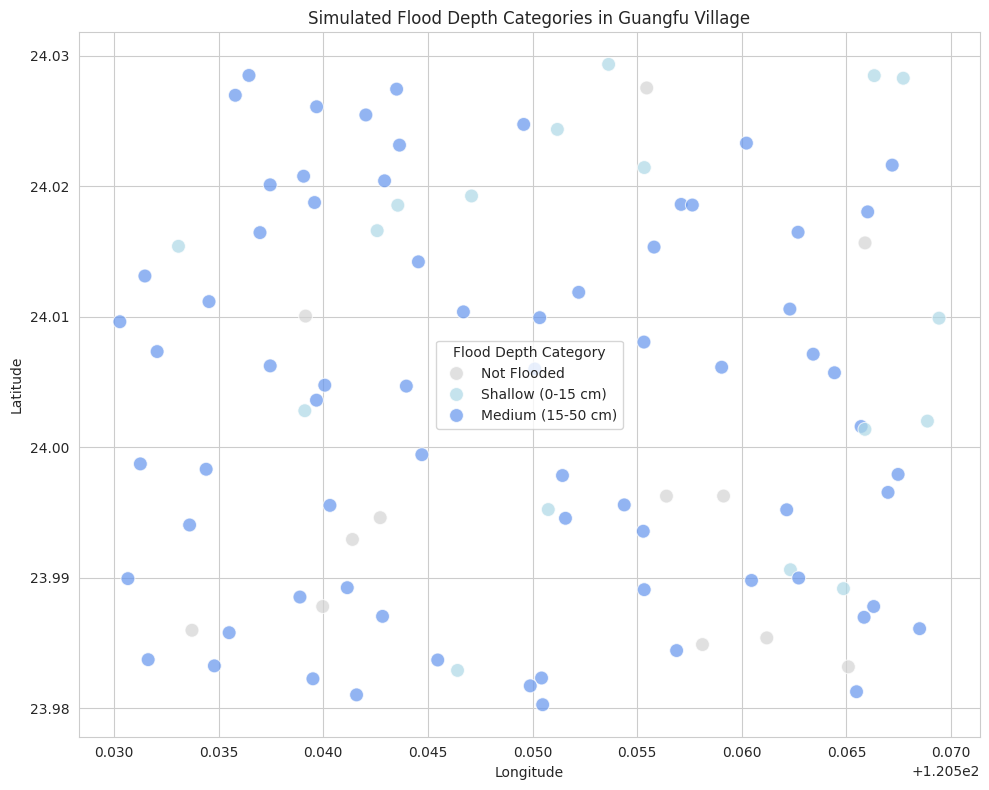

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")

# Define a color map for the flood depth categories
# Ensure a color is assigned to 'Not Flooded' as well
color_map = {
    'Not Flooded': 'lightgrey',
    'Shallow (0-15 cm)': 'lightblue',
    'Medium (15-50 cm)': 'cornflowerblue',
    'Deep (> 50 cm)': 'darkblue'
}

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=simulated_locations,
    x='longitude',
    y='latitude',
    hue='flood_depth_category',
    palette=color_map,
    s=100, # Point size
    alpha=0.7 # Transparency
)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Simulated Flood Depth Categories in Guangfu Village')

# Improve the legend
handles, labels = scatter.get_legend_handles_labels()
# Reorder legend to have 'Not Flooded' first, then increasing depth
order = ['Not Flooded', 'Shallow (0-15 cm)', 'Medium (15-50 cm)', 'Deep (> 50 cm)']
# Create a dictionary to map labels to their order for sorting
label_order = {label: i for i, label in enumerate(order)}
# Sort labels and handles based on the defined order
sorted_labels, sorted_handles = zip(*sorted(zip(labels, handles), key=lambda t: label_order.get(t[0], len(order))))

# Add legend to the plot with sorted handles and labels
plt.legend(sorted_handles, sorted_labels, title='Flood Depth Category')

# Ensure layout is tight
plt.tight_layout()

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial data collection step failed because the AI does not have the capability to perform external web searches or download files.
*   The data preprocessing step successfully created and cleaned a placeholder dataset simulating flood data, handling missing values and duplicates.
*   The flood modeling step provided a detailed conceptual outline for building a flood model, highlighting the need for additional data (topography, soil, land use, drainage) and explaining model selection, data integration, calibration, and validation processes.
*   The flood extent and depth analysis step simulated flood output data and conceptually described how spatial analysis (using GIS) would be used to identify flooded areas, assess depths, overlay with geographical maps, and calculate area by flood depth category.
*   The flood risk assessment step conceptually outlined how to combine the simulated flood results with real village data (population, buildings, infrastructure) using GIS to assess risk based on hazard, exposure, and vulnerability, and described how to present these results.
*   The visualization step successfully generated a scatter plot using the simulated data, color-coding points by simulated flood depth categories to visually represent the spatial distribution of flooding.

### Insights or Next Steps

*   The primary limitation throughout the process was the inability to access real-world geographical and flood data, which is essential for performing the actual analysis steps (modeling, spatial analysis, risk assessment).
*   Future work would require obtaining the necessary real-world data for Guangfu Village (topography, land use, infrastructure, historical flood/rainfall records) and utilizing a GIS environment with appropriate spatial analysis libraries to execute the described modeling, analysis, and risk assessment steps.
